In [63]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression

import matplotlib.pyplot as plt

In [32]:
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

## Univariate Selection

In [33]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

In [34]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [35]:
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


## Recursive Feature Elimination

In [36]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 4 5 1 1 2]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
# emplear 2 métodos
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)


In [53]:
# feature extraction
test = SelectKBest(score_func=f_regression, k=4)
fit = test.fit(X, y)

In [54]:
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 89.486  75.258 153.955  15.972 112.591 471.847  83.477  33.58   85.914
 141.761 175.106  63.054 601.618]


In [55]:
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[[ 2.31   6.575 15.3    4.98 ]
 [ 7.07   6.421 17.8    9.14 ]
 [ 7.07   7.185 17.8    4.03 ]
 [ 2.18   6.998 18.7    2.94 ]
 [ 2.18   7.147 18.7    5.33 ]]


In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [57]:
# feature extraction
model = LinearRegression()
rfe = RFE(model, 4)
fit2 = rfe.fit(X, y)
print("Num Features: %d" % fit2.n_features_)
print("Selected Features: %s" % fit2.support_)
print("Feature Ranking: %s" % fit2.ranking_)

Num Features: 4
Selected Features: [False False False  True  True  True False False False False  True False
 False]
Feature Ranking: [ 5  7  6  1  1  1 10  2  4  8  1  9  3]


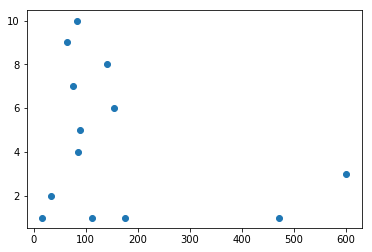

In [69]:
plt.scatter(fit.scores_, fit2.ranking_)

In [70]:
## Punto 6. Crear un GBRT

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [76]:
from sklearn.model_selection import GridSearchCV
# from sklearn.grid_search import GridSearchCV
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
'max_depth': [4, 6],
'min_samples_leaf': [3, 5, 9, 17],
'max_features': [1.0, 0.3, 0.1]}

In [81]:
est = GradientBoostingClassifier(n_estimators=10, verbose=1)
gs_cv = GridSearchCV(est, param_grid).fit(X, y)
# best hyperparameter setting
gs_cv.best_params_

      Iter       Train Loss   Remaining Time 
         1         128.3099            0.03s
         2         107.9582            0.03s
         3          91.8092            0.03s
         4          78.4718            0.02s
         5          67.4251            0.02s
         6          58.1594            0.01s
         7          50.3308            0.01s
         8          43.6715            0.01s
         9          38.0175            0.00s
        10          33.0157            0.00s
      Iter       Train Loss   Remaining Time 
         1         128.4332            0.03s
         2         108.5276            0.02s
         3          92.5809            0.02s
         4          79.5257            0.02s
         5          68.2560            0.01s
         6          58.8074            0.01s
         7          51.1385            0.01s
         8          44.3245            0.01s
         9          38.5143            0.00s
        10          33.7137            0.00s
      It

         5          70.7476            0.01s
         6          61.2087            0.01s
         7          53.2350            0.01s
         8          46.2934            0.00s
         9          40.7091            0.00s
        10          35.5518            0.00s
      Iter       Train Loss   Remaining Time 
         1         129.2317            0.02s
         2         109.3195            0.02s
         3          92.7328            0.02s
         4          80.1597            0.01s
         5          69.5759            0.01s
         6          60.3205            0.01s
         7          52.3018            0.01s
         8          45.7981            0.00s
         9          39.9838            0.00s
        10          35.1478            0.00s
      Iter       Train Loss   Remaining Time 
         1         130.4053            0.02s
         2         111.3989            0.02s
         3          94.9073            0.01s
         4          81.7281            0.01s
        

        10          49.3997            0.00s
      Iter       Train Loss   Remaining Time 
         1         130.2853            0.02s
         2         114.4973            0.02s
         3         101.0068            0.01s
         4          88.0693            0.01s
         5          78.3608            0.01s
         6          67.8736            0.01s
         7          61.7143            0.01s
         8          55.0806            0.00s
         9          49.1264            0.00s
        10          43.8207            0.00s
      Iter       Train Loss   Remaining Time 
         1         131.6069            0.02s
         2         115.3683            0.02s
         3         103.2243            0.01s
         4          90.4138            0.01s
         5          80.9814            0.01s
         6          71.2249            0.01s
         7          62.0924            0.01s
         8          54.8031            0.00s
         9          48.4237            0.00s
        

         3         116.2461            0.01s
         4         107.9126            0.01s
         5          97.9817            0.01s
         6          88.4798            0.01s
         7          81.0603            0.00s
         8          75.2000            0.00s
         9          68.7585            0.00s
        10          62.6214            0.00s
      Iter       Train Loss   Remaining Time 
         1         137.0197            0.02s
         2         120.7004            0.01s
         3         107.5432            0.01s
         4          97.0269            0.01s
         5          88.8975            0.01s
         6          82.1327            0.01s
         7          75.8018            0.00s
         8          69.6372            0.00s
         9          65.0472            0.00s
        10          60.3493            0.00s
      Iter       Train Loss   Remaining Time 
         1         128.3117            0.02s
         2         107.9581            0.02s
        

         2         114.9273            0.02s
         3         100.8761            0.02s
         4          89.1664            0.01s
         5          79.1533            0.01s
         6          70.6163            0.01s
         7          63.0152            0.01s
         8          56.6370            0.00s
         9          50.7311            0.00s
        10          45.8501            0.00s
      Iter       Train Loss   Remaining Time 
         1         133.9183            0.02s
         2         116.7867            0.02s
         3         102.5444            0.01s
         4          90.5882            0.01s
         5          80.5293            0.01s
         6          71.7661            0.01s
         7          63.9429            0.01s
         8          57.2377            0.00s
         9          51.4868            0.00s
        10          46.2881            0.00s
      Iter       Train Loss   Remaining Time 
         1         134.1332            0.02s
        

         6          63.7248            0.01s
         7          55.7719            0.01s
         8          49.6528            0.01s
         9          43.2435            0.00s
        10          38.2194            0.00s
      Iter       Train Loss   Remaining Time 
         1         129.8510            0.02s
         2         111.2365            0.02s
         3          96.4174            0.02s
         4          83.1146            0.01s
         5          72.3868            0.01s
         6          63.2065            0.01s
         7          55.3551            0.01s
         8          48.4644            0.01s
         9          42.7752            0.00s
        10          37.9022            0.00s
      Iter       Train Loss   Remaining Time 
         1         130.1120            0.02s
         2         111.5407            0.02s
         3          95.4855            0.02s
         4          82.9609            0.02s
         5          72.3145            0.01s
        

         7          87.5013            0.01s
         8          81.1388            0.01s
         9          75.2571            0.00s
        10          69.8765            0.00s
      Iter       Train Loss   Remaining Time 
         1         142.2847            0.02s
         2         130.5674            0.02s
         3         120.0562            0.02s
         4         110.6445            0.02s
         5         102.2066            0.01s
         6          94.5916            0.01s
         7          87.6447            0.01s
         8          81.3131            0.01s
         9          75.5287            0.00s
        10          70.1982            0.00s
      Iter       Train Loss   Remaining Time 
         1         141.1782            0.02s
         2         129.7071            0.02s
         3         119.5629            0.02s
         4         110.4042            0.02s
         5         102.1538            0.01s
         6          94.6746            0.01s
        

         2         130.8173            0.02s
         3         121.1165            0.02s
         4         112.0027            0.01s
         5         103.9010            0.01s
         6          96.5352            0.01s
         7          89.9793            0.01s
         8          83.8607            0.00s
         9          78.8604            0.00s
        10          73.6347            0.00s
      Iter       Train Loss   Remaining Time 
         1         142.3619            0.01s
         2         130.8848            0.01s
         3         121.1025            0.01s
         4         112.4248            0.01s
         5         104.2842            0.01s
         6          97.1141            0.01s
         7          90.8957            0.01s
         8          84.4565            0.00s
         9          78.8915            0.00s
        10          74.0097            0.00s
      Iter       Train Loss   Remaining Time 
         1         143.2601            0.02s
        

         8          92.4823            0.00s
         9          86.4350            0.00s
        10          81.5080            0.00s
      Iter       Train Loss   Remaining Time 
         1         143.6609            0.01s
         2         133.5680            0.01s
         3         125.2091            0.01s
         4         116.8091            0.01s
         5         108.5236            0.01s
         6         101.1745            0.01s
         7          94.4708            0.01s
         8          89.0283            0.00s
         9          83.9221            0.00s
        10          78.6300            0.00s
      Iter       Train Loss   Remaining Time 
         1         143.5055            0.02s
         2         133.0650            0.02s
         3         124.1592            0.01s
         4         118.2136            0.01s
         5         110.8593            0.01s
         6         104.5962            0.01s
         7          98.9909            0.01s
        

         2         129.2365            0.02s
         3         118.8464            0.02s
         4         109.4620            0.02s
         5         101.1419            0.02s
         6          93.6010            0.01s
         7          86.6447            0.01s
         8          80.3110            0.01s
         9          74.5542            0.00s
        10          69.2329            0.00s
      Iter       Train Loss   Remaining Time 
         1         142.2654            0.02s
         2         130.6885            0.02s
         3         120.1397            0.02s
         4         110.7028            0.02s
         5         102.1824            0.01s
         6          94.4808            0.01s
         7          87.5083            0.01s
         8          81.1390            0.01s
         9          75.3234            0.00s
        10          69.7860            0.00s
      Iter       Train Loss   Remaining Time 
         1         142.2835            0.02s
        

      Iter       Train Loss   Remaining Time 
         1         141.1396            0.03s
         2         129.6141            0.02s
         3         119.2401            0.02s
         4         110.2730            0.02s
         5         101.8206            0.01s
         6          94.4852            0.01s
         7          87.6515            0.01s
         8          81.4452            0.01s
         9          75.3731            0.00s
        10          70.1770            0.00s
      Iter       Train Loss   Remaining Time 
         1         141.4847            0.02s
         2         130.2021            0.02s
         3         119.9768            0.02s
         4         110.6500            0.02s
         5         102.5071            0.01s
         6          94.9228            0.01s
         7          88.0278            0.01s
         8          81.7716            0.01s
         9          75.9777            0.00s
        10          70.8520            0.00s
      It

         5         106.8396            0.01s
         6          99.6194            0.01s
         7          93.2162            0.01s
         8          87.0000            0.01s
         9          81.3201            0.00s
        10          76.1503            0.00s
      Iter       Train Loss   Remaining Time 
         1         143.7165            0.02s
         2         133.0461            0.02s
         3         123.9480            0.02s
         4         115.1320            0.02s
         5         106.8622            0.01s
         6          99.6455            0.01s
         7          92.9965            0.01s
         8          86.7766            0.01s
         9          81.0203            0.00s
        10          75.6335            0.00s
      Iter       Train Loss   Remaining Time 
         1         142.4809            0.02s
         2         132.1010            0.02s
         3         123.2113            0.02s
         4         114.5994            0.01s
        

         1         148.7104            0.03s
         2         143.5953            0.02s
         3         138.7249            0.02s
         4         134.0430            0.02s
         5         129.5754            0.01s
         6         125.2707            0.01s
         7         121.1539            0.01s
         8         117.2119            0.01s
         9         113.4634            0.00s
        10         109.8394            0.00s
      Iter       Train Loss   Remaining Time 
         1         148.7362            0.02s
         2         143.6474            0.02s
         3         138.8026            0.02s
         4         134.1830            0.01s
         5         129.7732            0.01s
         6         125.5588            0.01s
         7         121.5272            0.01s
         8         117.6660            0.00s
         9         113.9652            0.00s
        10         110.4150            0.00s
      Iter       Train Loss   Remaining Time 
        

         9         114.6695            0.00s
        10         111.2405            0.00s
      Iter       Train Loss   Remaining Time 
         1         148.8707            0.01s
         2         143.9938            0.01s
         3         139.3224            0.01s
         4         134.9450            0.01s
         5         130.6159            0.01s
         6         126.5216            0.01s
         7         122.5873            0.01s
         8         119.0339            0.00s
         9         115.7011            0.00s
        10         112.3566            0.00s
      Iter       Train Loss   Remaining Time 
         1         150.1210            0.02s
         2         145.2275            0.02s
         3         140.4129            0.01s
         4         135.7067            0.01s
         5         131.4611            0.01s
         6         127.2523            0.01s
         7         123.3464            0.01s
         8         119.8505            0.00s
        

         7         130.9568            0.01s
         8         127.9861            0.00s
         9         124.8331            0.00s
        10         121.5699            0.00s
      Iter       Train Loss   Remaining Time 
         1         149.3258            0.02s
         2         145.9308            0.02s
         3         141.5901            0.02s
         4         137.5110            0.01s
         5         133.2478            0.01s
         6         129.1878            0.01s
         7         125.7336            0.01s
         8         122.0524            0.00s
         9         118.3468            0.00s
        10         115.5139            0.00s
      Iter       Train Loss   Remaining Time 
         1         149.9843            0.02s
         2         145.5361            0.02s
         3         141.0616            0.01s
         4         137.6067            0.01s
         5         133.6677            0.01s
         6         129.5273            0.01s
        

        10         121.7818            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.7237            0.02s
         2         149.9871            0.02s
         3         147.1188            0.01s
         4         144.5180            0.01s
         5         141.3078            0.01s
         6         138.0846            0.01s
         7         135.2536            0.01s
         8         132.4879            0.00s
         9         129.9607            0.00s
        10         127.5839            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.2209            0.02s
         2         148.3779            0.02s
         3         146.3069            0.01s
         4         142.5599            0.01s
         5         140.3464            0.01s
         6         137.5551            0.01s
         7         135.4998            0.00s
         8         132.9484            0.00s
         9         130.4310            0.00s
        

         2         145.2393            0.02s
         3         141.1105            0.01s
         4         137.1614            0.01s
         5         133.3777            0.01s
         6         129.7498            0.01s
         7         126.2678            0.01s
         8         122.8845            0.00s
         9         119.6413            0.00s
        10         116.5370            0.00s
      Iter       Train Loss   Remaining Time 
         1         150.9260            0.03s
         2         146.6615            0.02s
         3         142.6494            0.02s
         4         138.7416            0.01s
         5         134.9222            0.01s
         6         131.3118            0.01s
         7         127.7941            0.01s
         8         124.4173            0.00s
         9         121.2606            0.00s
        10         118.1293            0.00s
      Iter       Train Loss   Remaining Time 
         1         151.1125            0.02s
        

         4         135.6608            0.02s
         5         131.7897            0.01s
         6         128.1764            0.01s
         7         124.3268            0.01s
         8         120.6044            0.01s
         9         116.8766            0.00s
        10         113.5394            0.00s
      Iter       Train Loss   Remaining Time 
         1         149.4742            0.02s
         2         144.7667            0.02s
         3         140.0883            0.02s
         4         135.5931            0.02s
         5         131.4956            0.01s
         6         127.7714            0.01s
         7         123.7486            0.01s
         8         119.9845            0.01s
         9         116.5635            0.00s
        10         113.0009            0.00s
      Iter       Train Loss   Remaining Time 
         1         149.0713            0.02s
         2         144.5084            0.02s
         3         140.2900            0.02s
        

         2         150.1031            0.02s
         3         147.5534            0.02s
         4         145.0653            0.01s
         5         142.6363            0.01s
         6         140.2643            0.01s
         7         137.9472            0.01s
         8         135.6643            0.00s
         9         133.3984            0.00s
        10         131.1835            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.8584            0.02s
         2         150.2133            0.02s
         3         147.6327            0.02s
         4         145.1141            0.02s
         5         142.6554            0.01s
         6         140.2541            0.01s
         7         137.9083            0.01s
         8         135.6158            0.01s
         9         133.3751            0.00s
        10         131.1661            0.00s
      Iter       Train Loss   Remaining Time 
         1         151.4530            0.02s
        

         2         149.0272            0.02s
         3         146.6404            0.01s
         4         144.2240            0.01s
         5         141.8387            0.01s
         6         139.6019            0.01s
         7         137.4672            0.01s
         8         135.4219            0.00s
         9         133.2764            0.00s
        10         131.1565            0.00s
      Iter       Train Loss   Remaining Time 
         1         151.6088            0.02s
         2         149.2394            0.02s
         3         146.8349            0.01s
         4         144.5055            0.01s
         5         142.2122            0.01s
         6         139.9655            0.01s
         7         137.8051            0.01s
         8         135.7152            0.00s
         9         133.6519            0.00s
        10         131.6666            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.9693            0.02s
        

         7         140.6554            0.01s
         8         139.2058            0.00s
         9         137.5766            0.00s
        10         136.1101            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.3160            0.02s
         2         150.1781            0.02s
         3         148.3987            0.02s
         4         146.2651            0.01s
         5         144.2451            0.01s
         6         141.8793            0.01s
         7         140.0395            0.01s
         8         137.9695            0.00s
         9         136.4487            0.00s
        10         134.7532            0.00s
      Iter       Train Loss   Remaining Time 
         1         151.9989            0.02s
         2         149.8083            0.02s
         3         147.8584            0.01s
         4         145.6209            0.01s
         5         143.7740            0.01s
         6         141.8515            0.01s
        

         6         138.7362            0.01s
         7         136.3809            0.01s
         8         134.1134            0.01s
         9         131.8637            0.00s
        10         129.6646            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.7168            0.02s
         2         150.1031            0.02s
         3         147.5534            0.02s
         4         145.0652            0.02s
         5         142.6362            0.02s
         6         140.2642            0.01s
         7         137.9471            0.01s
         8         135.6641            0.01s
         9         133.3982            0.00s
        10         131.1833            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.8584            0.03s
         2         150.2133            0.02s
         3         147.6327            0.02s
         4         145.1141            0.02s
         5         142.6554            0.02s
        

         1         151.4471            0.03s
         2         148.8375            0.02s
         3         146.2389            0.02s
         4         143.8011            0.02s
         5         141.3661            0.01s
         6         138.9577            0.01s
         7         136.6399            0.01s
         8         134.4019            0.01s
         9         132.2394            0.00s
        10         130.1380            0.00s
      Iter       Train Loss   Remaining Time 
         1         151.4888            0.02s
         2         148.8691            0.02s
         3         146.4135            0.02s
         4         143.9949            0.02s
         5         141.5447            0.01s
         6         139.2192            0.01s
         7         136.8661            0.01s
         8         134.5812            0.01s
         9         132.2814            0.00s
        10         130.0882            0.00s
      Iter       Train Loss   Remaining Time 
        

         9         133.9187            0.00s
        10         132.0652            0.00s
      Iter       Train Loss   Remaining Time 
         1         151.6184            0.02s
         2         149.4674            0.02s
         3         147.0722            0.02s
         4         144.6972            0.01s
         5         142.3782            0.01s
         6         140.1993            0.01s
         7         137.9423            0.01s
         8         135.7817            0.01s
         9         133.7093            0.00s
        10         132.0827            0.00s
      Iter       Train Loss   Remaining Time 
         1         152.9849            0.02s
         2         150.4447            0.02s
         3         148.2398            0.02s
         4         146.0689            0.02s
         5         144.0707            0.01s
         6         141.8716            0.01s
         7         139.8097            0.01s
         8         137.6461            0.01s
        

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 0.1,
 'min_samples_leaf': 3}

In [82]:
gs_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 0.1,
 'min_samples_leaf': 3}